# Homework 2

Deadline: lab session in the week of **25-28.11.2024**
Each task is worth 1 point.

## 1. Maximization of Functions using Gradient Descent



**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.


Lets start from calculating gradient of f(x):  
$\frac{df}{dx} = -4x^3 + 8x - 2$   

$\frac{dg}{dx} = -2x + 2y$  
$\frac{dg}{dy} = -2y + 2x - z$  
$\frac{dg}{dz} = -2z - y + 3$  

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
eps = 1e-6

def f(x):
    return -pow(x, 4) + 4 * x*x - 2*x +1

def df(x):
    return -4 * pow(x, 3) + 8 * x - 2

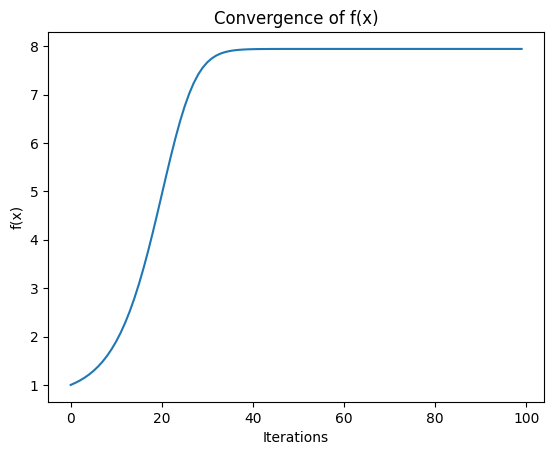

In [17]:
import torch
from mpl_toolkits.mplot3d import Axes3D

def maximize_f_x():
    def f(x):
        return -x**4 + 4*x**2 - 2*x + 1

    x = torch.tensor(0.0, requires_grad=True)
    alpha = 0.01  # learning rate
    num_iterations = 100
    values = []

    for _ in range(num_iterations):
        y = f(x)
        y.backward()  # compute gradient
        with torch.no_grad():
            x += alpha * x.grad
            x.grad.zero_()
        values.append(y.item())

    # plot
    plt.plot(values)
    plt.title("Convergence of f(x)")
    plt.xlabel("Iterations")
    plt.ylabel("f(x)")
    plt.show()

maximize_f_x()


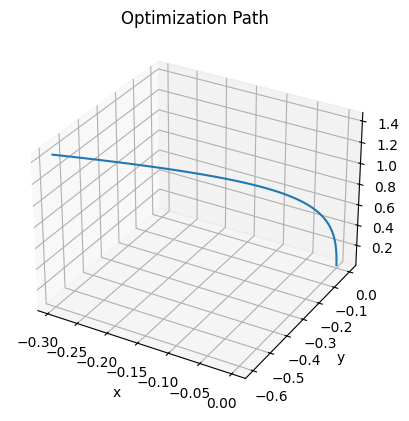

In [15]:
# (b) maximize f(x, y, z)
def maximize_f_xyz():
    def f(x, y, z):
        return -x**2 - y**2 - z**2 + 2*x*y - y*z + 3*z

    vars = torch.tensor([0.0, 0.0, 0.0], requires_grad=True)
    alpha = 0.01  # learning rate
    num_iterations = 100
    path = []  # store (x, y, z) path

    for _ in range(num_iterations):
        x, y, z = vars
        y_value = f(x, y, z)
        y_value.backward()  # compute gradients
        with torch.no_grad():
            vars += alpha * vars.grad  # gradient ascent
            vars.grad.zero_()  # clear gradients
        path.append(vars.clone().detach().numpy())

    # convert path to 3D coordinates
    path = torch.tensor(path)
    x, y, z = path[:, 0], path[:, 1], path[:, 2]

    # plot 3D path
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.plot(x, y, z)
    ax.set_title("Optimization Path")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.show()

maximize_f_xyz()


## 2. Linear Regression in PyTorch


**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:


In [18]:
import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon



**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).


## 3. Learning Rate Analysis


**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.


## 4. Polynomial Regression Extension


**Dataset**: Use the following code to create a dataset of 100 samples:


In [ ]:

np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon



**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.


## 5. Overfitting and Regularization


**Dataset**: Use the following code to generate a dataset with 150 samples:


In [ ]:

np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon



**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.


## 6. Custom Gradient Descent in PyTorch


**Dataset**: Use the same dataset from Problem 2.

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.


## 7. Dataset Size and Convergence


**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:


In [ ]:

np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))



**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.


## 8. Effect of Model Complexity on Overfitting


**Dataset**: Use the following code to generate a dataset of 200 samples:


In [ ]:

np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon



**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.


## 9. Gradient Descent for Non-linear Data


**Dataset**: Use the following code to generate a dataset of 100 samples:


In [ ]:

np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon



**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.
